# Wind Turbine Power Prediction

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:\\Users\\91797\\Downloads\\T1.csv\\T1.csv")

df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%d %m %Y %H:%M")

num_cols = df.select_dtypes(include=['number']).columns

df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


The dataset contains:

Date/Time (for 10 minutes intervals)

LV ActivePower (kW): The power generated by the turbine for that moment

Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)

TheoreticalPowerCurve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the 
turbine manufacturer

Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

# # EDA

In [286]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


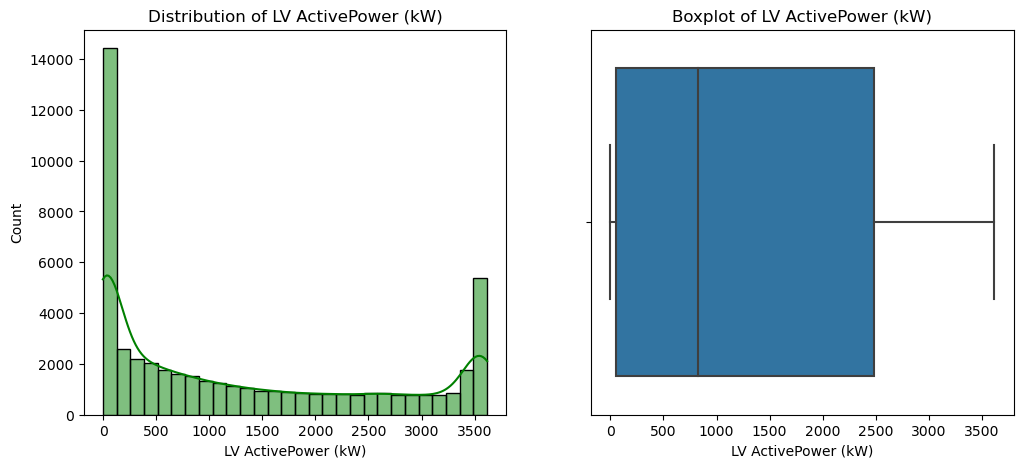

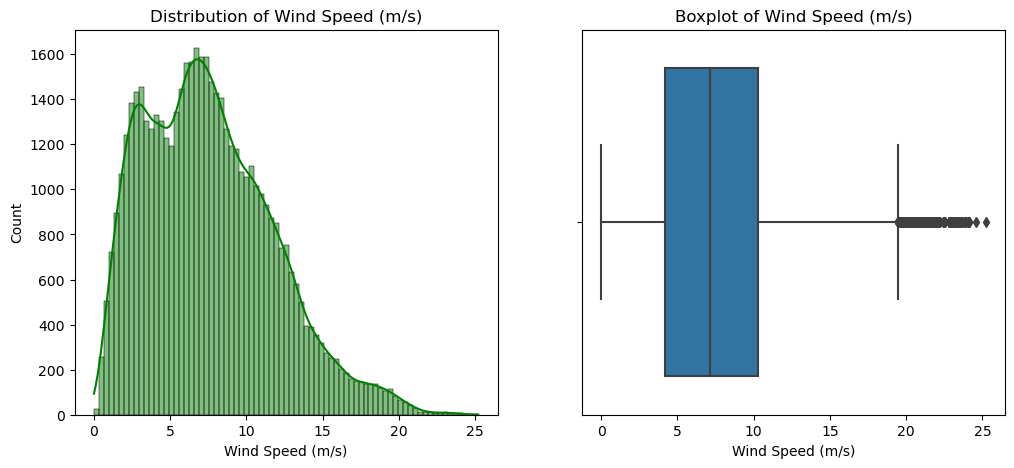

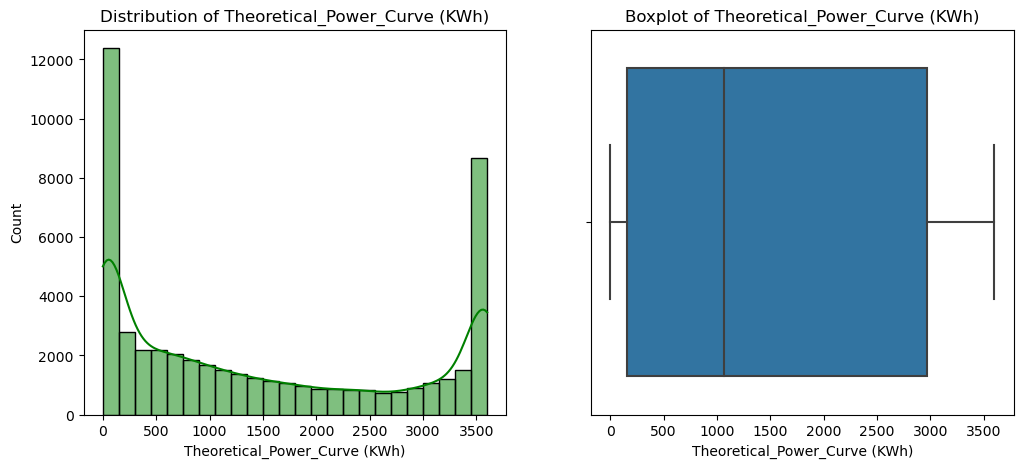

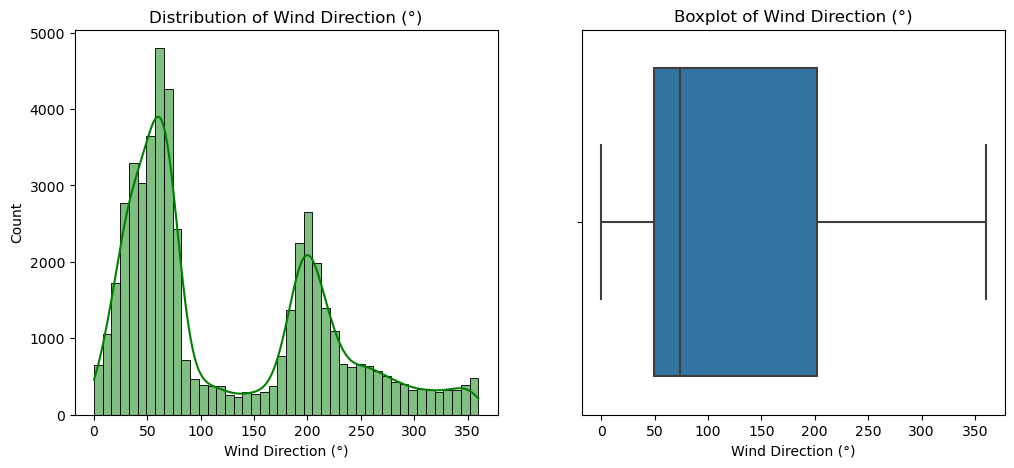

In [287]:
# Distribution and Box Plots
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Distribution Plot
    sns.histplot(df[col], ax=ax[0], kde=True, color='green')  
    ax[0].set_title(f'Distribution of {col}')
    
    # Box Plot
    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f'Boxplot of {col}')
    
    plt.show()

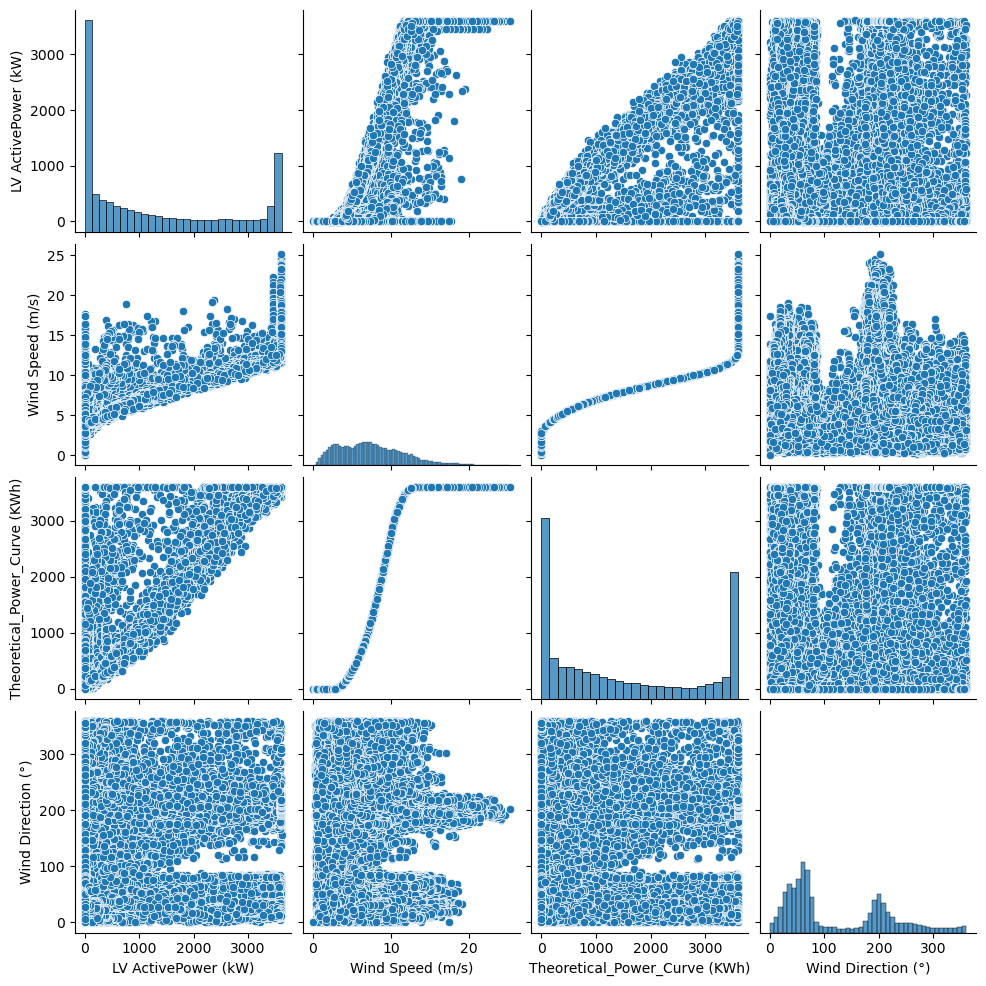

In [288]:
# Pair Plot
sns.pairplot(df[num_cols])
plt.show()

We can see there are lower level power production for some wind directions.

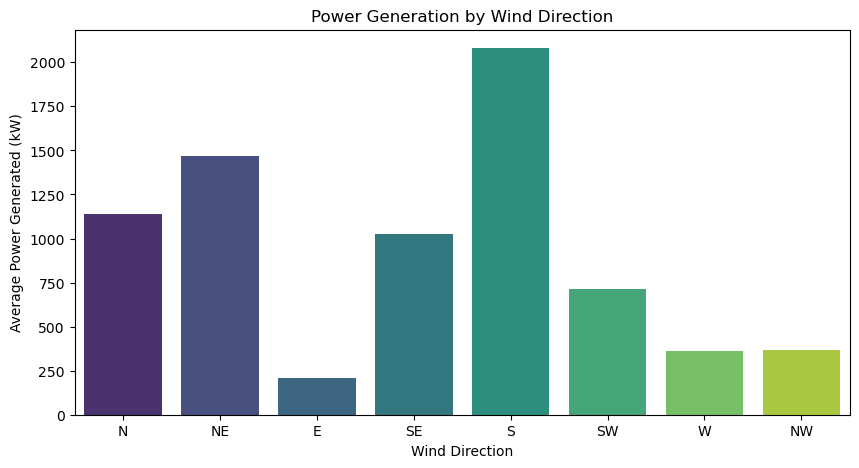

In [289]:
bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]
labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

# Assign wind directions
df['Wind_Direction_Category'] = pd.cut(df['Wind Direction (°)'], bins=bins, labels=labels, include_lowest=True)

# Compute average power per wind direction
avg_power_by_direction = df.groupby('Wind_Direction_Category')['LV ActivePower (kW)'].mean().sort_values()

# Plot bar graph
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_power_by_direction.index, y=avg_power_by_direction.values, palette="viridis")
plt.xlabel("Wind Direction")
plt.ylabel("Average Power Generated (kW)")
plt.title("Power Generation by Wind Direction")
plt.show()


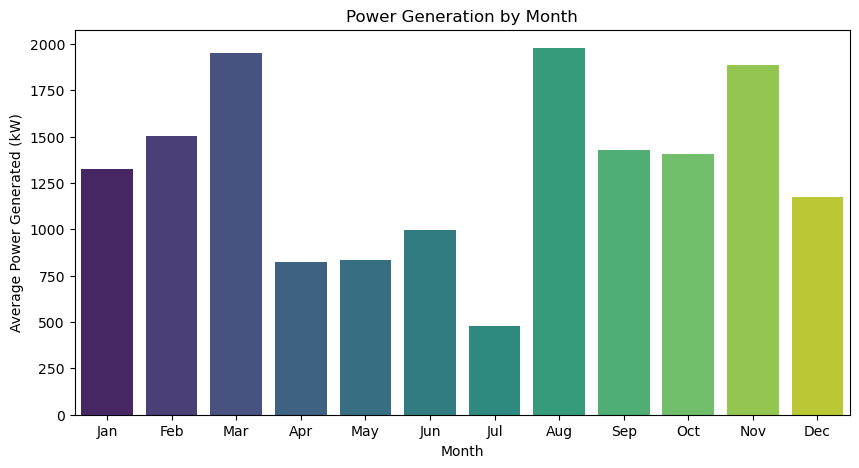

In [290]:
df['Month'] = df['Date/Time'].dt.strftime('%b')  # Short month name (Jan, Feb, etc.)

# Compute average power per month
avg_power_by_month = df.groupby('Month')['LV ActivePower (kW)'].mean()

# Sort months in chronological order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_power_by_month = avg_power_by_month.reindex(month_order)

# Plot bar graph
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_power_by_month.index, y=avg_power_by_month.values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Average Power Generated (kW)")
plt.title("Power Generation by Month")
plt.show()

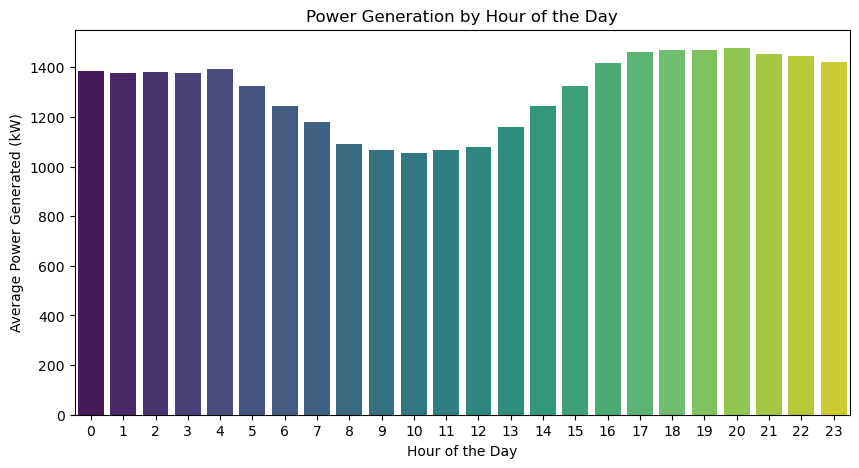

In [291]:
df['Hour'] = df['Date/Time'].dt.hour

# Compute average power per hour
avg_power_by_hour = df.groupby('Hour')['LV ActivePower (kW)'].mean()

# Plot bar graph
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_power_by_hour.index, y=avg_power_by_hour.values, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Power Generated (kW)")
plt.title("Power Generation by Hour of the Day")
plt.xticks(range(0, 24))
plt.show()

We can observe taht during few hours in early day there is less power getting produced let us check the seasonality in this case

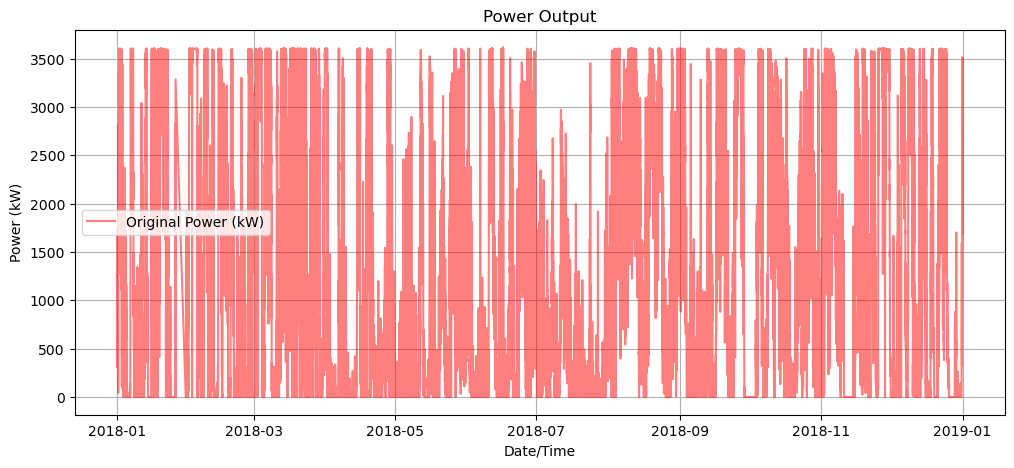

In [292]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date/Time'], df['LV ActivePower (kW)'], label='Original Power (kW)', alpha=0.5, color='red')
plt.xlabel('Date/Time')
plt.ylabel('Power (kW)')
plt.title('Power Output')
plt.legend()
plt.grid()
plt.show()

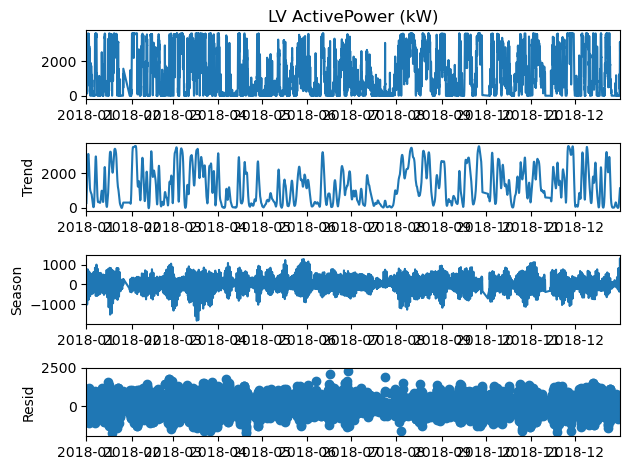

<Figure size 640x480 with 0 Axes>

C:\Users\91797\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



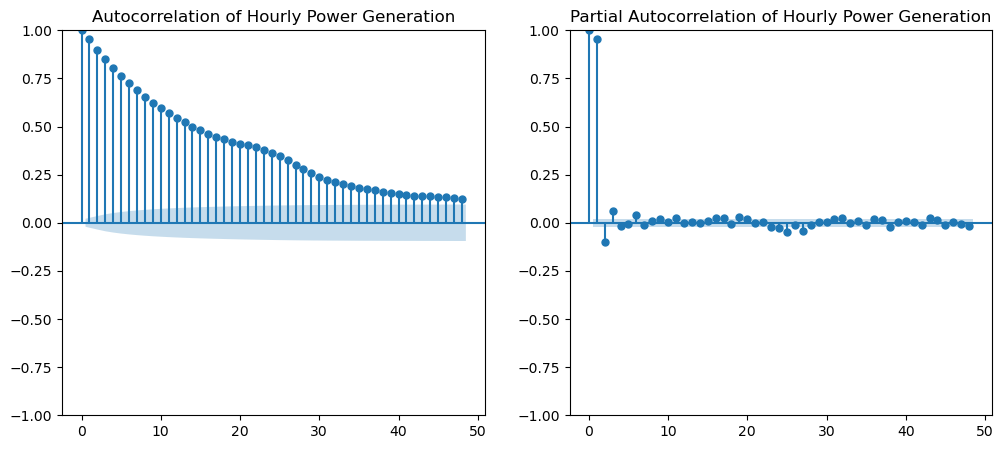

In [284]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df.set_index('Date/Time', inplace=True)

# Resample data to hourly mean
df_hourly = df['LV ActivePower (kW)'].resample('H').mean()

# **Fix Missing Values**
df_hourly = df_hourly.interpolate()  # Fill NaNs with linear interpolation


from statsmodels.tsa.seasonal import STL
df_resampled = df['LV ActivePower (kW)'].resample('H').mean().asfreq('H')
stl = STL(df_resampled.dropna(), period=24)
result = stl.fit()
result.plot()
plt.show()

plt.suptitle("Hourly Time Series Decomposition")
plt.show()

# **Autocorrelation Plots**
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df_hourly.dropna(), ax=ax[0], lags=48)  # Up to 2 days
plot_pacf(df_hourly.dropna(), ax=ax[1], lags=48)  # Up to 2 days
ax[0].set_title("Autocorrelation of Hourly Power Generation")
ax[1].set_title("Partial Autocorrelation of Hourly Power Generation")
plt.show()

The residual plot indicates potential anomalies or unexplained variations not captured by the trend and seasonal components.
Although th ACF plot shows a strong, gradually decaying positive correlation my conclusion is that the data is not showing hourly seasonality.

# Anomaly Detetcion

In [293]:
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
# Calculate Power Difference
df['Power_Diff'] = df['Theoretical_Power_Curve (KWh)'] - df['LV ActivePower (kW)']

# Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['IF_Anomaly'] = iso_forest.fit_predict(df[['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Power_Diff']])
df['IF_Anomaly'] = df['IF_Anomaly'].apply(lambda x: 1 if x == -1 else 0)

C:\Users\91797\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



The code creates a new columns in the DataFrame know as IF_Anomaly, which indicate whether each data point is considered an anomaly or not using isolation forest method (1 for anomaly, 0 for normal)

In [294]:
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Wind_Direction_Category,Month,Hour,Power_Diff,IF_Anomaly
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,SW,Jan,0,36.281117,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,SW,Jan,0,66.148316,0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,W,Jan,0,84.523429,0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,W,Jan,0,96.481664,0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,SW,Jan,0,111.052276,0
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,NE,Dec,23,433.209835,0
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,NE,Dec,23,-511.297256,0
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,NE,Dec,23,-412.822178,0
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,NE,Dec,23,-97.311588,0


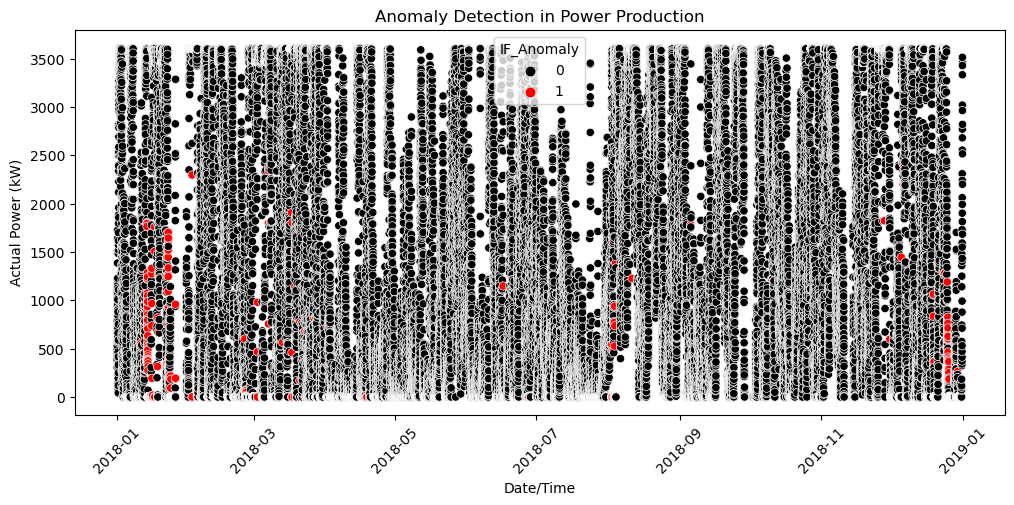

In [295]:
# Plot anomalies
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['Date/Time'], y=df['LV ActivePower (kW)'], hue=df['IF_Anomaly'], palette={0: 'black', 1: 'red'})
plt.xlabel("Date/Time")
plt.ylabel("Actual Power (kW)")
plt.title("Anomaly Detection in Power Production")
plt.xticks(rotation=45)
plt.show()

In [296]:
# Print detected anomalies
anomalies = df[df['IF_Anomaly'] == 1]
anomalies

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Wind_Direction_Category,Month,Hour,Power_Diff,IF_Anomaly
1474,2018-01-11 09:10:00,558.426514,10.879940,3228.384864,166.755905,SE,Jan,9,2669.958350,1
1475,2018-01-11 09:20:00,0.000000,10.971560,3262.307881,167.217804,SE,Jan,9,3262.307881,1
1476,2018-01-11 09:30:00,0.000000,10.526490,3078.324921,0.000000,N,Jan,9,3078.324921,1
1477,2018-01-11 09:40:00,0.000000,10.432140,3032.812040,179.270004,SE,Jan,9,3032.812040,1
1835,2018-01-13 21:30:00,1805.360962,12.289940,3560.007524,43.527470,N,Jan,21,1754.646562,1
...,...,...,...,...,...,...,...,...,...,...
49681,2018-12-26 02:30:00,269.607300,9.803116,2663.481637,22.317539,N,Dec,2,2393.874337,1
49682,2018-12-26 02:40:00,285.787598,10.393620,3013.534684,22.765690,N,Dec,2,2727.747087,1
49683,2018-12-26 02:50:00,252.190796,9.856317,2699.478367,21.016661,N,Dec,2,2447.287571,1
49690,2018-12-26 04:00:00,186.179794,10.206590,2914.007032,14.107920,N,Dec,4,2727.827238,1


We can observe that the power difference in this anamolies is too high compare to the normal observation let us plot the grph to visualize powerdiff when a anamoly is present

In [297]:
import plotly.express as px
fig = px.scatter(df, x='Date/Time', y='Power_Diff', color='IF_Anomaly')
fig.update_layout(
        title='Date/Time, Power_Diff scatter plot', 
        xaxis={
            "showgrid": True, 
            "rangeslider": {
                "visible": True, 
                "thickness": 0.05
            }
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show(renderer="iframe")

# ML model
The objective of this section is to train a model to help us determine whether there is a failure occuring in near future

In [298]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df = df.drop(columns=['Wind_Direction_Category','Power_Diff'])
# Convert Date/Time to datetime format
df = df.sort_values(by='Date/Time')

# Extract relevant features
df['Month'] = df['Date/Time'].dt.month
df['Hour'] = df['Date/Time'].dt.hour

we calculate a target variable, Failure_Next_24H, based on the IF_Anomaly column (which, as we saw before, indicates anomalies detected by the Isolation Forest method) we apply rolling aggregation to detect if there is a failure expected in next 24 hours

In [299]:
# Create target variable: Failure within next 24 hours
df['Failure_Next_24H'] = df['IF_Anomaly'].rolling(window=24, min_periods=1).max().shift(-24).fillna(0)


Let's say IF_Anomaly looks like this (simplified):

Hour | IF_Anomaly
------- | --------
1      | 0
2      | 0
3      | 1  (Anomaly detected)
4      | 0
...    | ...
25     | 0
26     | 0
After applying the rolling window, maximum, and shift, Failure_Next_24H will look like this:

Hour | Failure_Next_24H
------- | ----------------
1      | 1  (Because of the anomaly at hour 3)
2      | 1  (Because of the anomaly at hour 3)
...    | ...
24     | 1  (Because of the anomaly at hour 3)
25     | 0  (No anomaly in the next 24 hours)
26     | 0  (No anomaly in the next 24 hours)

In [300]:
# Lag features (previous values)
for lag in [1, 6, 12, 24]:
    for col in ['Wind Speed (m/s)', 'LV ActivePower (kW)']:
        df[f'{col}_lag_{lag}h'] = df[col].shift(lag)

# Rolling window features
df['Rolling_Mean_Wind'] = df['Wind Speed (m/s)'].rolling(window=6).mean()
df['Rolling_Std_Power'] = df['LV ActivePower (kW)'].rolling(window=6).std()


df = df.dropna()

Lagged features capture the temporal dependencies in time series data. They allow the model to "see" past values of a variable, which can be very useful for prediction.  For example, the wind speed in the previous hour might be a strong predictor of the wind speed in the current hour.
The rolling window used here is to smooth the data and captures local trends and variability.

In [307]:
# Select final features
final_features = [col for col in df.columns if col not in ['Date/Time', 'IF_Anomaly', 'Failure_Next_24H']]

# Split into train (80%) and test (20%) based on time
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Train-Test Split
X_train, y_train = train_data[final_features], train_data['Failure_Next_24H']
X_test, y_test = test_data[final_features], test_data['Failure_Next_24H']

In [308]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      9685
         1.0       0.88      0.33      0.48       417

    accuracy                           0.97     10102
   macro avg       0.93      0.66      0.73     10102
weighted avg       0.97      0.97      0.96     10102

Confusion Matrix:
 [[9666   19]
 [ 280  137]]


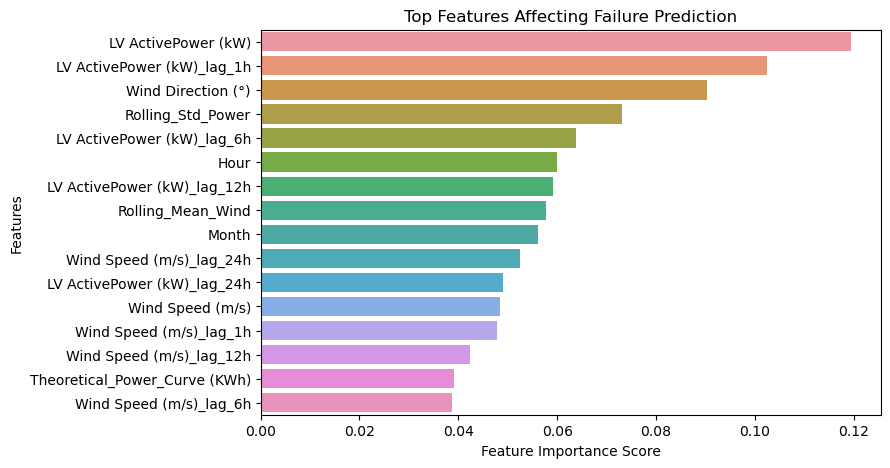

In [309]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=final_features).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Features Affecting Failure Prediction")
plt.show()

In [310]:
test_df = test_data.copy()  
test_df['Predicted_Failure_Next_24H'] = y_pred 
test = test_df[['Date/Time'] + final_features + ['Failure_Next_24H', 'Predicted_Failure_Next_24H']]
test

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,Hour,Wind Speed (m/s)_lag_1h,LV ActivePower (kW)_lag_1h,Wind Speed (m/s)_lag_6h,LV ActivePower (kW)_lag_6h,Wind Speed (m/s)_lag_12h,LV ActivePower (kW)_lag_12h,Wind Speed (m/s)_lag_24h,LV ActivePower (kW)_lag_24h,Rolling_Mean_Wind,Rolling_Std_Power,Failure_Next_24H,Predicted_Failure_Next_24H
40428,2018-10-18 23:20:00,0.000000,2.038939,0.000000,241.738693,10,23,2.387723,0.000000,1.898071,0.000000,2.618884,0.000000,3.984874,45.421360,2.293154,0.000441,0.0,0.0
40429,2018-10-18 23:30:00,0.000000,2.238692,0.000000,216.348404,10,23,2.038939,0.000000,2.154090,0.000000,2.200879,0.000000,3.682052,31.954149,2.307255,0.000441,0.0,0.0
40430,2018-10-18 23:40:00,0.000000,2.606488,0.000000,201.431503,10,23,2.238692,0.000000,2.289220,0.000000,2.737125,0.000000,3.255773,12.122350,2.360133,0.000441,0.0,0.0
40431,2018-10-18 23:50:00,0.000000,2.570408,0.000000,222.224396,10,23,2.606488,0.000000,2.458950,0.000000,2.283611,0.000000,3.675153,37.408871,2.378709,0.000441,0.0,0.0
40432,2018-10-19 00:00:00,0.000000,2.134171,0.000000,206.347198,10,0,2.570408,0.000000,2.430004,0.000000,2.071293,0.000000,3.817984,44.601540,2.329404,0.000441,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,12,23,12.559170,3514.269043,10.713670,3019.893066,8.498631,1901.602051,5.782113,877.915283,11.812263,303.980241,0.0,0.0
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,12,23,11.404030,2963.980957,10.154550,2771.110107,9.635618,2240.629883,5.478546,711.683228,11.341946,703.607240,0.0,0.0
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,12,23,7.332648,1684.353027,12.067660,3333.819092,8.472826,1814.355957,6.146048,992.034119,10.736562,765.770540,0.0,0.0
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,12,23,8.435358,2201.106934,12.195660,3455.282959,8.433422,1992.348999,7.936307,1574.197998,10.274180,717.862859,0.0,0.0


In [311]:


# Sorted Failure_Next_24H in ascending order
test = test.sort_values(by='Failure_Next_24H', ascending=True, na_position='first')

# Sorted Date/Time in ascending order
test = test.sort_values(by='Date/Time', ascending=True, na_position='first')

# Filtered Failure_Next_24H
test = test[test['Failure_Next_24H'] == 1]


In [312]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.scatter(test, x='Date/Time', y=[
            'Failure_Next_24H',
            'Predicted_Failure_Next_24H'
        ])
fig.update_layout(
        title='Date/Time, Failure_Next_24H, Predicted_Failure_Next_24H scatter plot', 
        xaxis={
            "showgrid": True, 
            "rangeslider": {
                "visible": True, 
                "thickness": 0.05
            }
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show(renderer="iframe")